
## ZMUM 1

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

Naszą uwagę będziemy skupiać na znalezieniu wektora $w$.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy:

$$e_1=\hat{f}(x_1)−y_1$$
$$e_2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e_k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e_1, … , e_k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.

$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cxccc}
1&x_1&x_1^2&...&x_1^n\\
1&x_2&x_2^2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&x_k^2&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

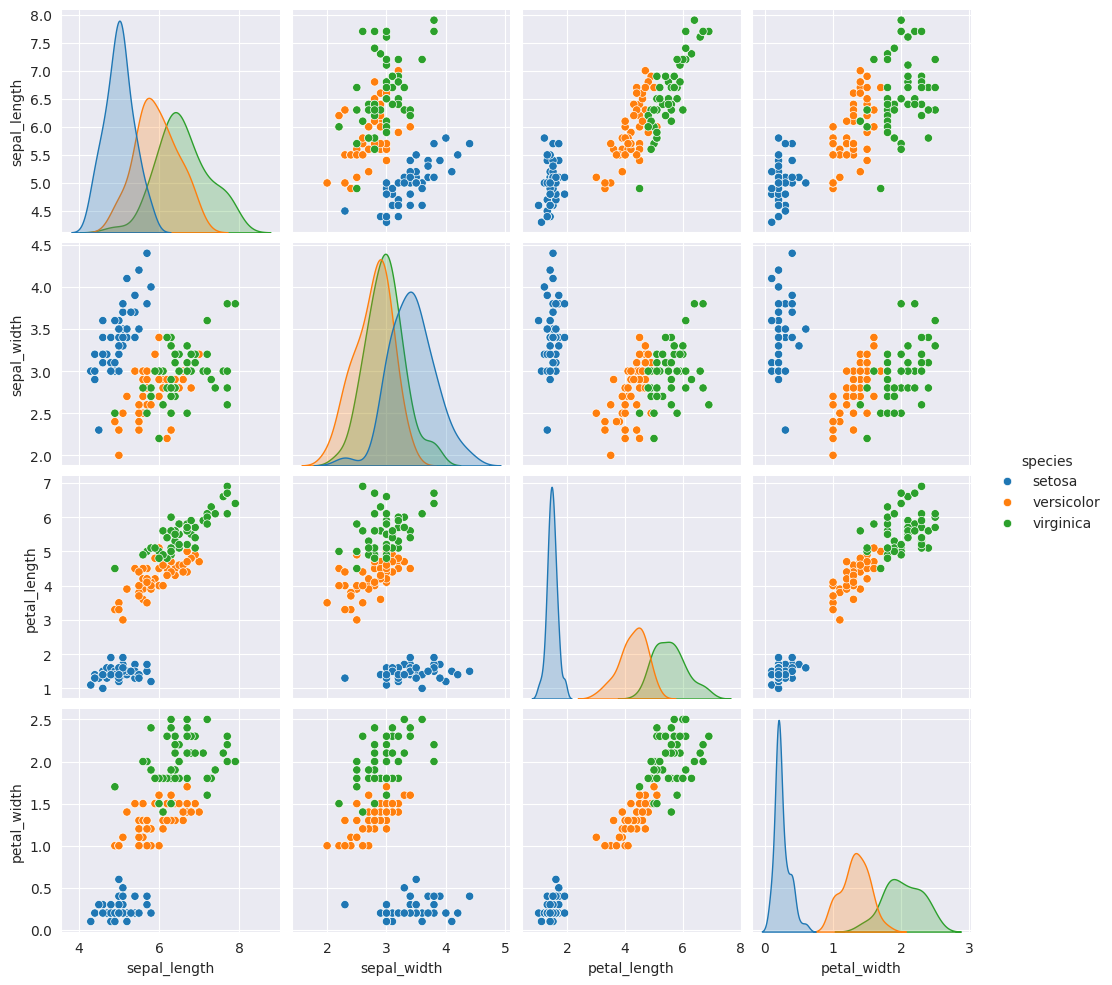

In [3]:
%matplotlib inline
from seaborn import load_dataset

iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue="species")
plt.show()

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

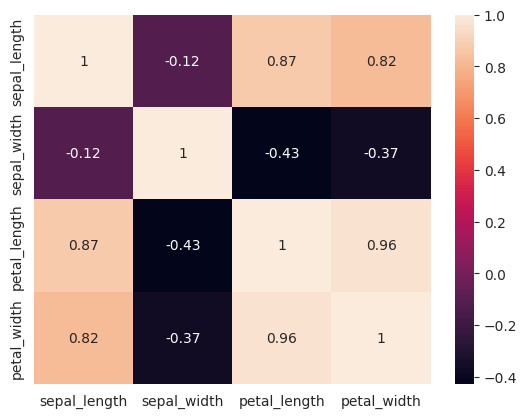

In [4]:
sns.heatmap(iris.corr(numeric_only=True), annot=iris.corr(numeric_only=True))
plt.show()

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
x = iris.iloc[:, 0].values.reshape(-1, 1)
y = iris.iloc[:, 3].values.reshape(-1, 1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [7]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [8]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [9]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

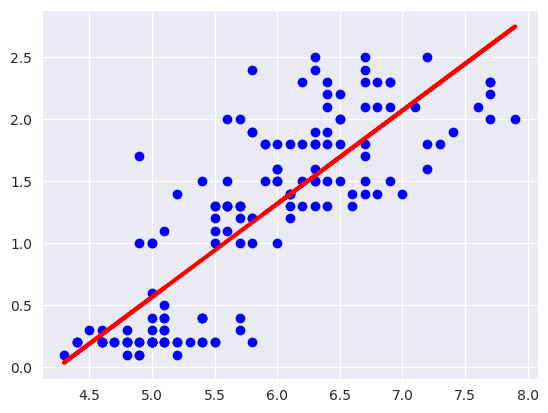

In [10]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [11]:
e = metrics.mean_squared_error(y, y_pred)
e

np.float64(0.19101500769427357)

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [12]:
x = iris.iloc[:, 0].values

In [13]:
X = np.vstack((np.ones(len(x)), x)).T

In [14]:
X.shape

(150, 2)

In [15]:
y.shape

(150, 1)

In [16]:
import scipy


def our_regression(dane, atr1, atr2):
    x = dane.iloc[:, atr1].values
    y = dane.iloc[:, atr2].values.reshape(-1, 1)
    X = np.vstack((np.ones(len(x)), x)).T
    #     w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    w = np.dot(scipy.linalg.pinv(X), y)

    e = np.sum((np.dot(X, w) - y) ** 2) / len(x)

    #np.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv2(X) # pseudoinwersja bazująca na metodzie SVD

    return w, e


In [17]:
w, e = our_regression(iris, 0, 3)
print(w)
print(e)

[[-3.200215  ]
 [ 0.75291757]]
0.1910150076942736


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

In [18]:
print(our_regression(iris, 0, 1))
print(our_regression(iris, 0, 2))
print(our_regression(iris, 0, 3))
print(our_regression(iris, 1, 2))
print(our_regression(iris, 1, 3))
print(our_regression(iris, 2, 3))

(array([[ 3.41894684],
       [-0.0618848 ]]), np.float64(0.18610437589381357))
(array([[-7.10144337],
       [ 1.85843298]]), np.float64(0.7430610341321241))
(array([[-3.200215  ],
       [ 0.75291757]]), np.float64(0.1910150076942736))
(array([[ 9.06315061],
       [-1.73522152]]), np.float64(2.5272893400281986))
(array([[ 3.15687229],
       [-0.64027659]]), np.float64(0.4997692648522702))
(array([[-0.36307552],
       [ 0.41575542]]), np.float64(0.04206730919499319))


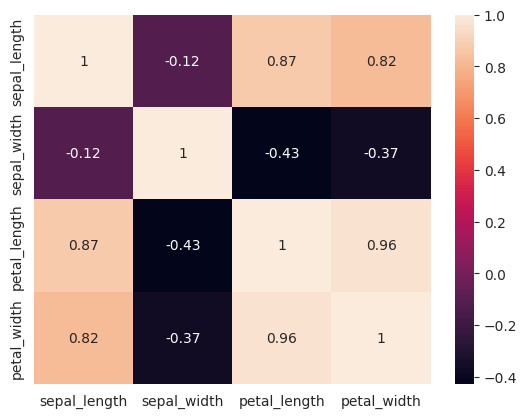

In [19]:
sns.heatmap(iris.corr(numeric_only=True), annot=iris.corr(numeric_only=True))
plt.show()

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

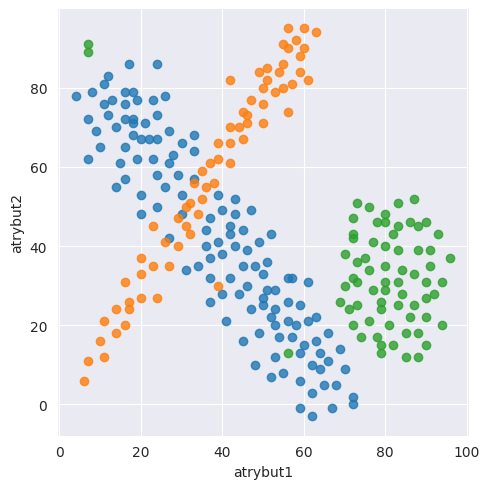

In [20]:
d = pd.read_csv('dane10.csv')
sns.lmplot(x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [21]:
d.klasa.unique()

array(['klasa 3', 'klasa 2', 'klasa 1'], dtype=object)

In [22]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:, 0].values.reshape(-1, 1)
y = dd.iloc[:, 1].values.reshape(-1, 1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


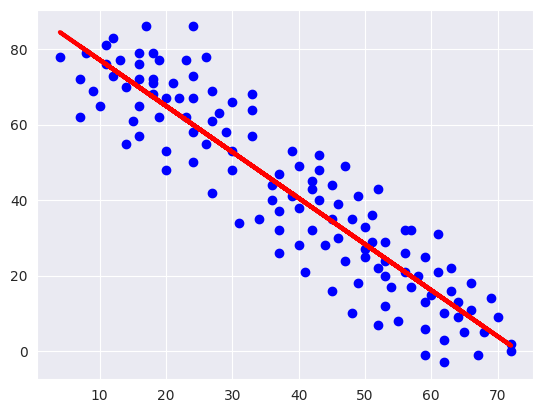

In [23]:
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

In [24]:
dd = d[d.klasa == 'klasa 1']
x = dd.iloc[:, 0].values.reshape(-1, 1)
y = dd.iloc[:, 1].values.reshape(-1, 1)
print(x.T)
print(y.T)

[[56  7  7 84 80 79 82 80 73 70 70 72 73 76 80 83 87 90 93 96 94 92 94 90
  88 85 82 79 79 78 74 72 71 69 72 72 72 77 78 80 83 86 88 88 91 91 87 84
  83 80 80 83 90 90 90 88 85 86 87 83 79 77 76 75 73 73 76 81]]
[[13 91 89 28 29 24 43 40 36 30 38 47 51 50 48 51 52 46 43 37 31 28 20 15
  12 12 15 13 15 17 17 20 24 26 32 42 43 41 46 46 45 46 45 39 39 35 33 34
  39 35 31 31 31 27 22 18 18 22 25 25 26 29 34 37 31 25 21 20]]


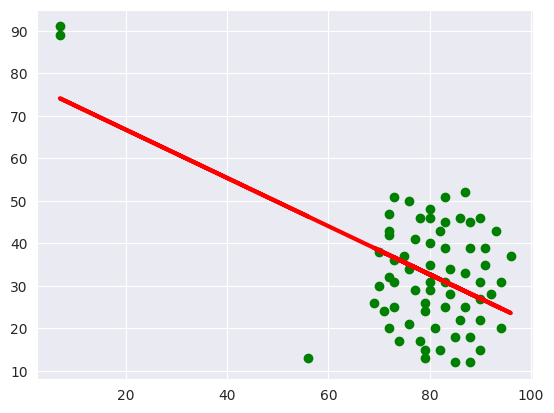

In [25]:
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x, y, color='green')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [26]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

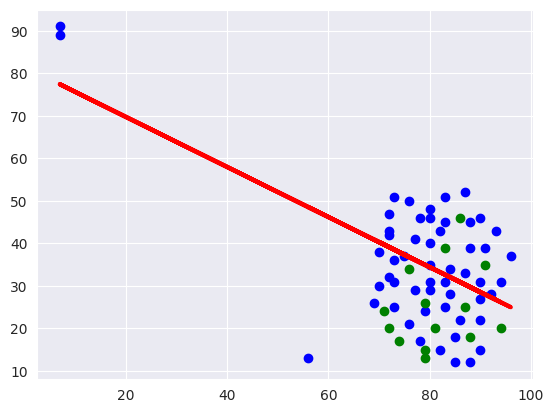

błąd uczenia 143.7605900852357
błąd generalizacji 195.55161262816824


In [27]:
regressor = LinearRegression()
regressor.fit(x_ucz, y_ucz)
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia', e_ucz)
print('błąd generalizacji', e_test)

In [28]:
def run_regressors(x, y, learning_error, generalisation_error, slopes):
    for i in range(6):
        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

        r = LinearRegression()
        r.fit(x_ucz, y_ucz)

        ypreducz = r.predict(x_ucz)
        ypredtest = r.predict(x_test)
        slopes.append(r.coef_[0][0])

        eucz = metrics.mean_squared_error(y_ucz, ypreducz)
        etest = metrics.mean_squared_error(y_test, ypredtest)

        learning_error.append(eucz)
        generalisation_error.append(etest)

        axs[i].scatter(x_ucz, y_ucz, color='blue')
        axs[i].scatter(x_test, y_test, color='green')
        axs[i].plot(x_ucz, ypreducz, color='red', linewidth=3)
        axs[i].set_title(f"Iteracja {i}")
        print(f'Dla iteracji {i} błąd uczenia {eucz}')
        print(f'Dla iteracji {i} błąd generalizacji {etest}')
        print('')


Dla iteracji 0 błąd uczenia 143.7605900852357
Dla iteracji 0 błąd generalizacji 195.55161262816824

Dla iteracji 1 błąd uczenia 157.46975060274795
Dla iteracji 1 błąd generalizacji 145.0444534364505

Dla iteracji 2 błąd uczenia 131.27805869695464
Dla iteracji 2 błąd generalizacji 233.7945969729704

Dla iteracji 3 błąd uczenia 139.96617706509213
Dla iteracji 3 błąd generalizacji 199.16746921114623

Dla iteracji 4 błąd uczenia 155.12246747650738
Dla iteracji 4 błąd generalizacji 138.61516482112725

Dla iteracji 5 błąd uczenia 164.50293882427687
Dla iteracji 5 błąd generalizacji 101.90540035742265


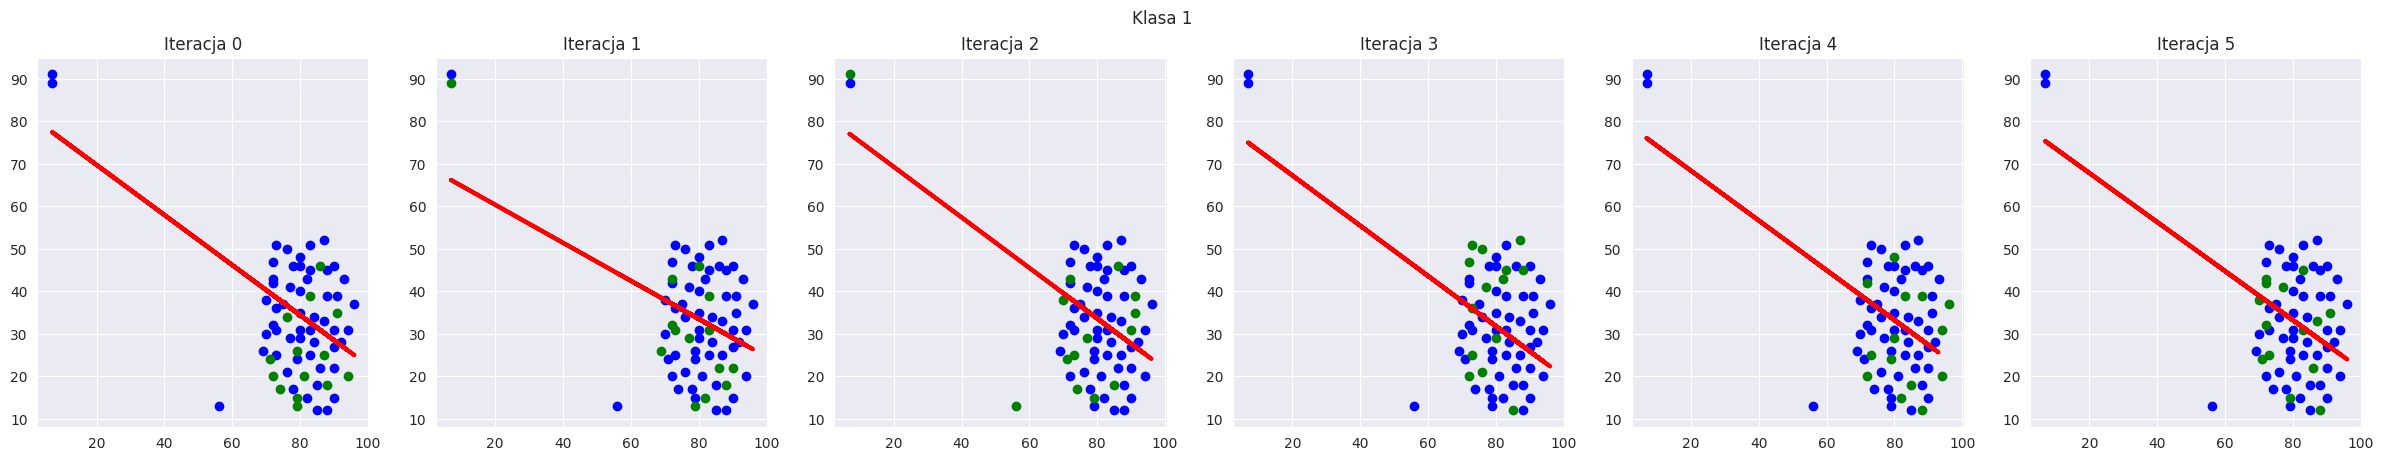

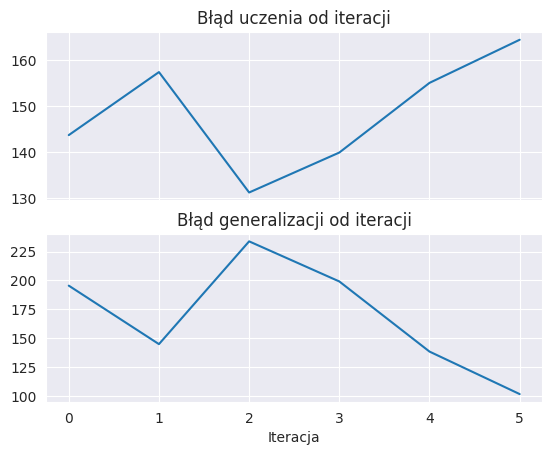

In [29]:
dd = d[d.klasa == 'klasa 1']

x = dd.iloc[:, 0].values.reshape(-1, 1)
y = dd.iloc[:, 1].values.reshape(-1, 1)

learning_error = []
generalisation_error = []
slopes1 = []

fig, axs = plt.subplots(nrows=1, ncols=6)
fig.set_figwidth(30)

fig.suptitle("Klasa 1")

run_regressors(x, y, learning_error, generalisation_error, slopes1)

fig_errs, (learr, gerr) = plt.subplots(nrows=2, ncols=1, sharex=True)

learr.plot(range(6), learning_error)
plt.xlabel("Iteracja")
learr.set_title("Błąd uczenia od iteracji")

gerr.plot(range(6), generalisation_error)
gerr.set_title("Błąd generalizacji od iteracji");

Dla *klasy 1* żadne rozdanie losowe danych testowych nie pomaga bo nie ma na pierwszy rzut oka zależności liniowej. Zaskakujące jest to, że błąd generalizacji i uczenia jest odbiciem lustrzanym jeśli chodzi o charakterystykę wykresu.

Dla iteracji 0 błąd uczenia 48.45425790798868
Dla iteracji 0 błąd generalizacji 10.180715401260013

Dla iteracji 1 błąd uczenia 41.63244168612218
Dla iteracji 1 błąd generalizacji 37.52277611819982

Dla iteracji 2 błąd uczenia 25.047016662503555
Dla iteracji 2 błąd generalizacji 101.86083118092291

Dla iteracji 3 błąd uczenia 42.98247977621739
Dla iteracji 3 błąd generalizacji 33.89731050937531

Dla iteracji 4 błąd uczenia 42.30565673026997
Dla iteracji 4 błąd generalizacji 34.837022273285754

Dla iteracji 5 błąd uczenia 43.23340936589467
Dla iteracji 5 błąd generalizacji 30.7433085465058


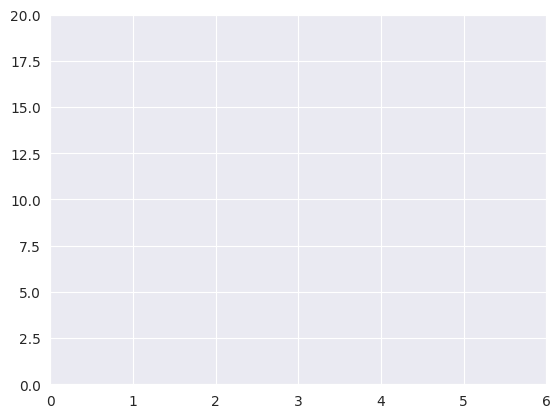

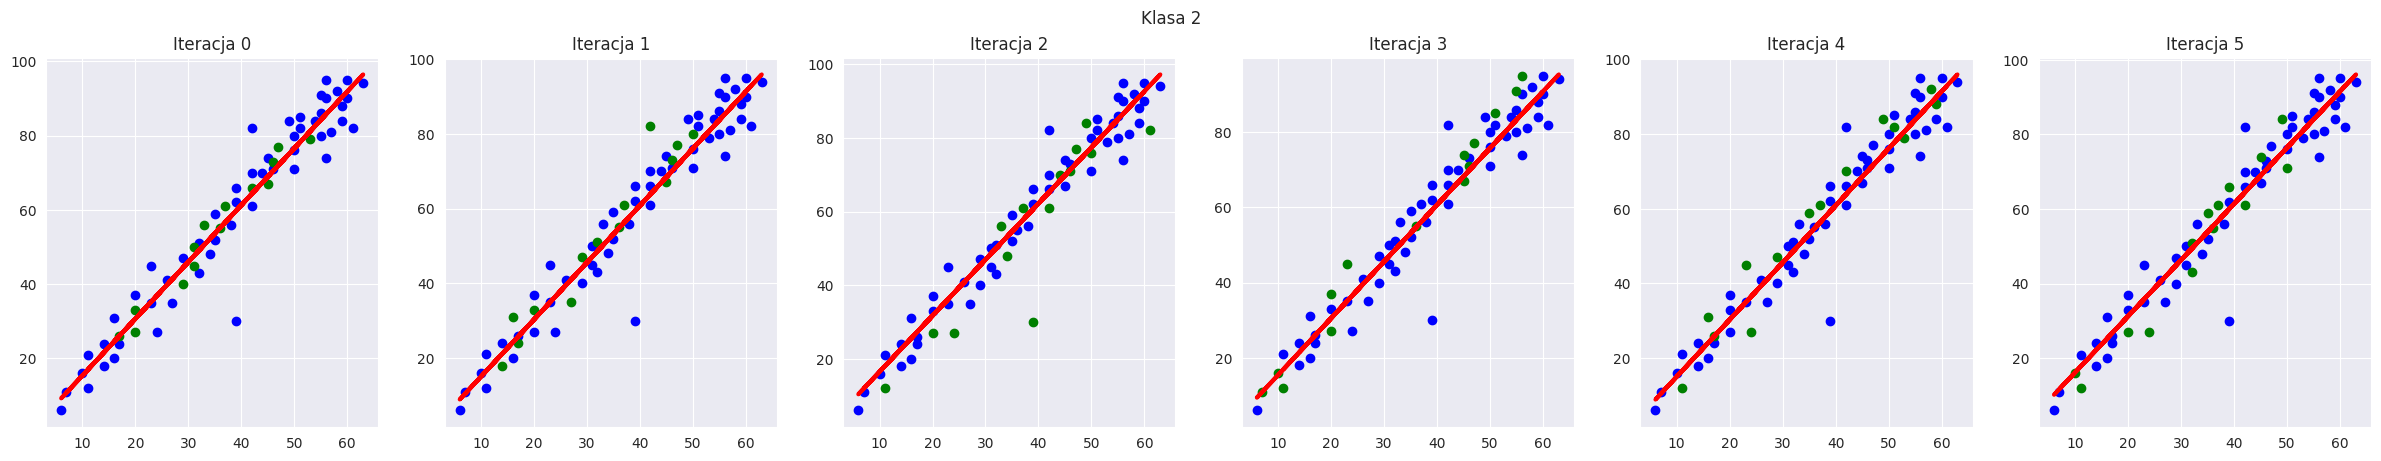

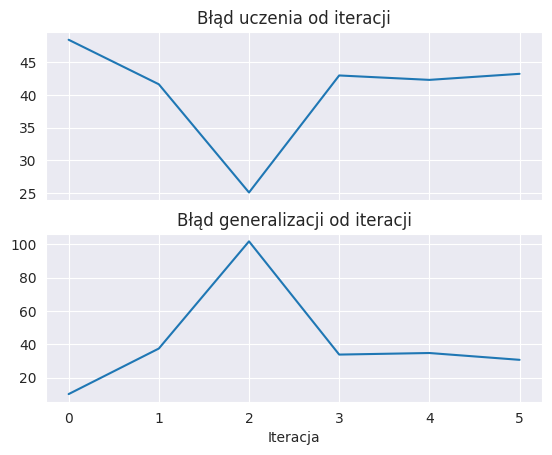

In [38]:
dd = d[d.klasa == 'klasa 2']

x = dd.iloc[:, 0].values.reshape(-1, 1)
y = dd.iloc[:, 1].values.reshape(-1, 1)

learning_error = []
generalisation_error = []
slopes2 = []

fig, axs = plt.subplots(nrows=1, ncols=6)
fig.set_figwidth(30)

fig.suptitle("Klasa 2")

run_regressors(x, y, learning_error, generalisation_error, slopes2)

fig_errs, (learr, gerr) = plt.subplots(nrows=2, ncols=1, sharex=True)

learr.plot(range(6), learning_error)
plt.xlabel("Iteracja")
learr.set_title("Błąd uczenia od iteracji")

gerr.plot(range(6), generalisation_error)
gerr.set_title("Błąd generalizacji od iteracji");

Dla iteracji 0 błąd uczenia 97.90961693115158
Dla iteracji 0 błąd generalizacji 109.05710100604452

Dla iteracji 1 błąd uczenia 117.74438392608673
Dla iteracji 1 błąd generalizacji 33.063579082352526

Dla iteracji 2 błąd uczenia 99.93213036113795
Dla iteracji 2 błąd generalizacji 106.36792163429433

Dla iteracji 3 błąd uczenia 95.5953990865092
Dla iteracji 3 błąd generalizacji 119.84136631554692

Dla iteracji 4 błąd uczenia 83.83758315848932
Dla iteracji 4 błąd generalizacji 170.29735621154043

Dla iteracji 5 błąd uczenia 100.06654488052898
Dla iteracji 5 błąd generalizacji 102.04231020873301


Text(0.5, 1.0, 'Błąd generalizacji od iteracji')

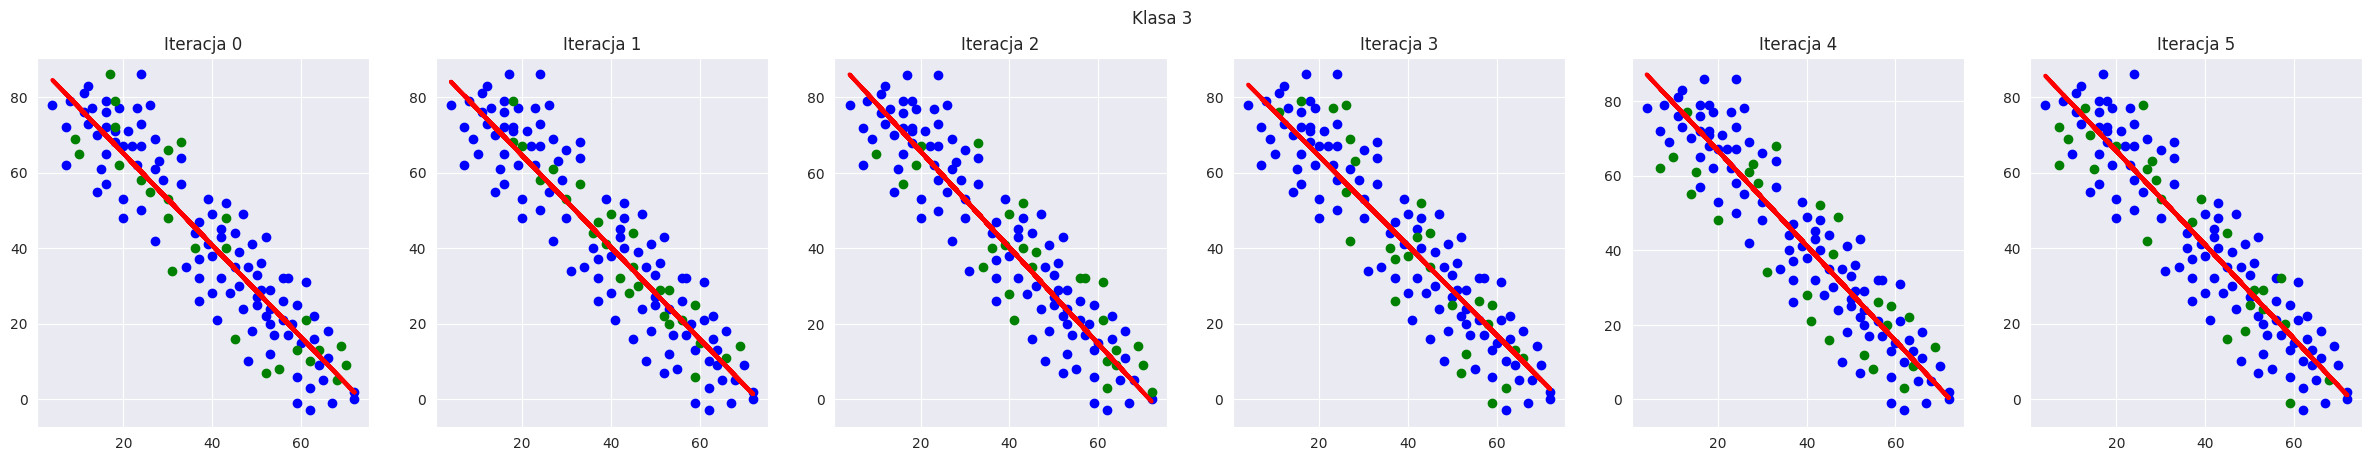

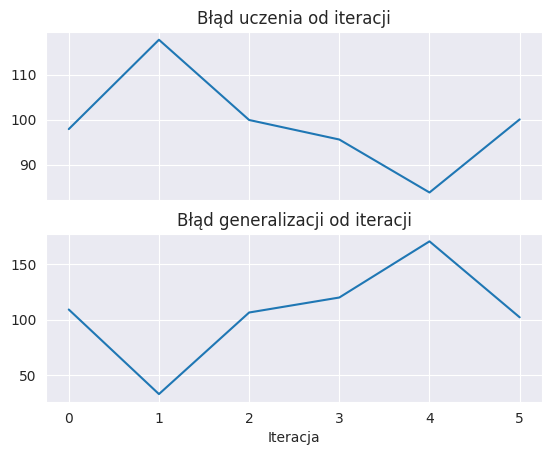

In [39]:
dd = d[d.klasa == 'klasa 3']

x = dd.iloc[:, 0].values.reshape(-1, 1)
y = dd.iloc[:, 1].values.reshape(-1, 1)

learning_error = []
generalisation_error = []
slopes3 = []

fig, axs = plt.subplots(nrows=1, ncols=6)
fig.set_figwidth(30)

fig.suptitle("Klasa 3")

run_regressors(x, y, learning_error, generalisation_error, slopes3)

fig_errs, (learr, gerr) = plt.subplots(nrows=2, ncols=1, sharex=True)

learr.plot(range(6), learning_error)
plt.xlabel("Iteracja")
learr.set_title("Błąd uczenia od iteracji")

gerr.plot(range(6), generalisation_error)
gerr.set_title("Błąd generalizacji od iteracji")

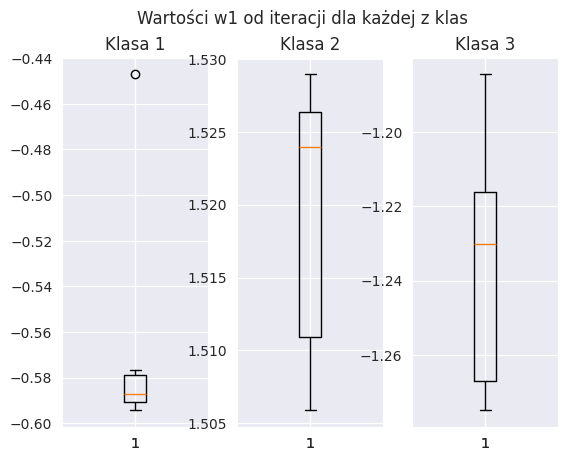

In [32]:
fig_boxes, (b1, b2, b3) = plt.subplots(nrows=1, ncols=3, sharex=True)
fig_boxes.suptitle("Wartości w1 od iteracji dla każdej z klas")
b1.boxplot(slopes1)
b1.set_title("Klasa 1")
b2.boxplot(slopes2)
b2.set_title("Klasa 2")
b3.boxplot(slopes3)
b3.set_title("Klasa 3");

Zaskakująco najstabilniejszy jest model dla klasy 1, prawdopodobnie dlatego, że nie miało za bardzo znaczenia jakie punkty z klastra są podobierane bo większość jest skupiona w tym samym miejscu.

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Dlaczego ?

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

In [40]:
%matplotlib notebook
ile_probek = 30
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []


def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print('x = %d, y = %d' % (ix, iy))
    ax.plot(ix, iy, 'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1, ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx, xx_org + np.random.rand(len(xx_org)) / 2), axis=0)
                yy = np.concatenate((yy, yy_org + np.random.rand(len(yy_org)) / 2), axis=0)
        df = pd.DataFrame({'x': xx, 'y': yy})


cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [41]:
df = pd.DataFrame(df)
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


,x,y
0,0.024194,0.453869
1,0.036290,0.507982
2,0.036290,0.507982
3,0.072581,0.507982
4,0.205645,0.832657
5,0.338710,1.157332
6,0.592742,1.644345
7,0.895161,2.672484
8,1.173387,3.754735
9,1.391129,5.269886


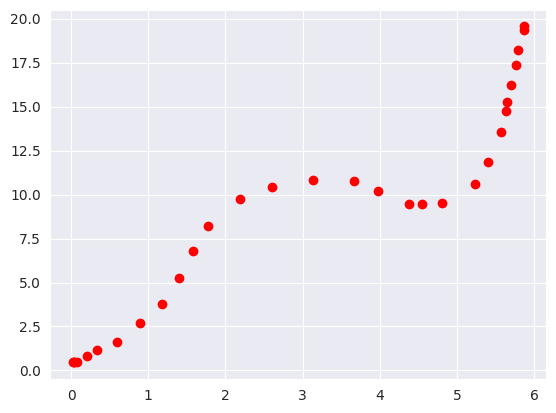

In [42]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')

Poniżej mamy funkcję, która tworzy macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [43]:
import scipy


def our_regression(dane, atr1, atr2, stopien):
    x = dane.iloc[:, atr1].values
    y = dane.iloc[:, atr2].values.reshape(-1, 1)
    X = np.ones(len(x))
    if stopien >= 1:
        for i in range(1, stopien + 1):
            X = np.vstack((X, np.power(x, i)))
        X = X.T
    else:
        print("Stopień wielomianu powinien być > 0 ")
        return

    #     w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    w = np.dot(scipy.linalg.pinv(X), y)

    e = np.sum((np.dot(X, w) - y) ** 2) / len(x)

    #np.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv2(X) # pseudoinwersja bazująca na metodzie SVD

    return w, e

In [44]:
print(our_regression(df, 0, 1, 1))
print(our_regression(df, 0, 1, 2))
print(our_regression(df, 0, 1, 3))
print(our_regression(df, 0, 1, 5))
print(our_regression(df, 0, 1, 10))
print(our_regression(df, 0, 1, 2))

(array([[0.99317491],
       [2.5532979 ]]), np.float64(4.200624127232094))
(array([[ 0.82475517],
       [ 2.80599972],
       [-0.04213866]]), np.float64(4.184359102550206))
(array([[-0.83525505],
       [ 8.65443177],
       [-2.76986343],
       [ 0.3108695 ]]), np.float64(2.19054528803783))
(array([[ 0.53229081],
       [-0.10821921],
       [ 3.88007817],
       [-0.82239123],
       [-0.08649413],
       [ 0.02222482]]), np.float64(0.07787795110743777))
(array([[ 3.72432199e-01],
       [ 2.84536607e+00],
       [-2.65819179e-01],
       [-9.83150883e+00],
       [ 2.21120366e+01],
       [-1.85326915e+01],
       [ 8.06683299e+00],
       [-2.01894320e+00],
       [ 2.93691016e-01],
       [-2.31285591e-02],
       [ 7.63984651e-04]]), np.float64(0.024879439736226847))
(array([[ 0.82475517],
       [ 2.80599972],
       [-0.04213866]]), np.float64(4.184359102550206))


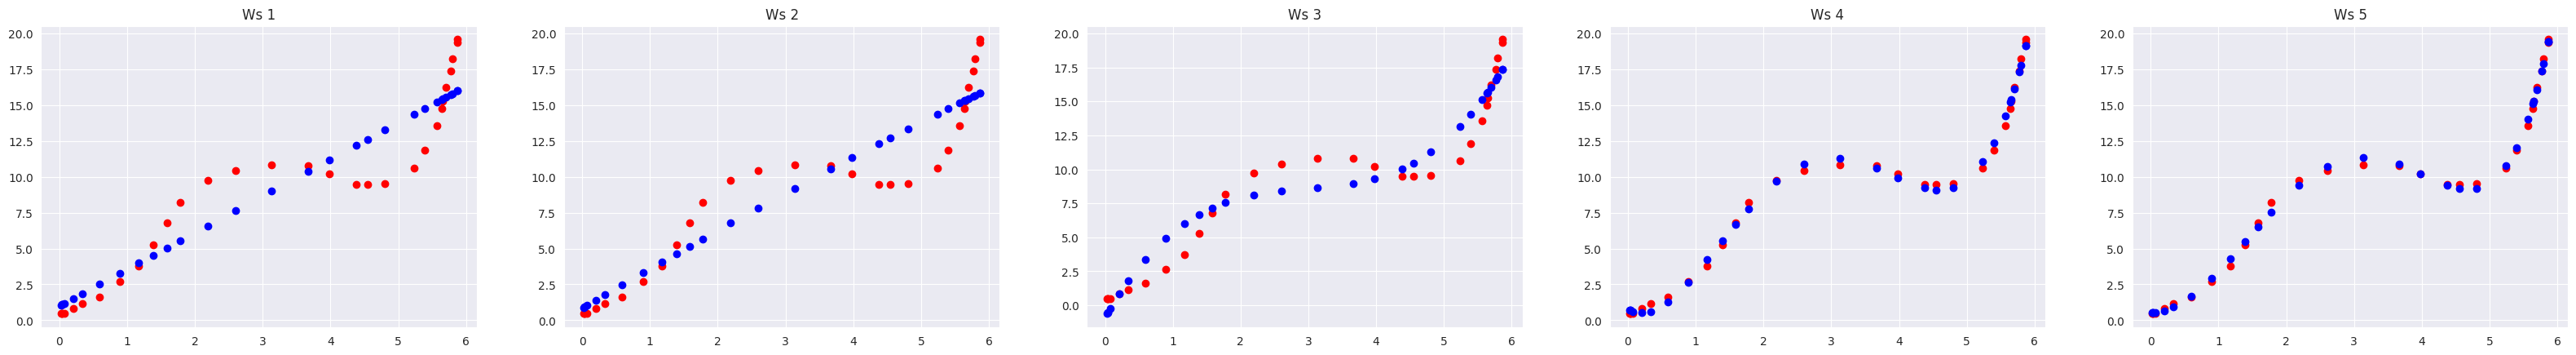

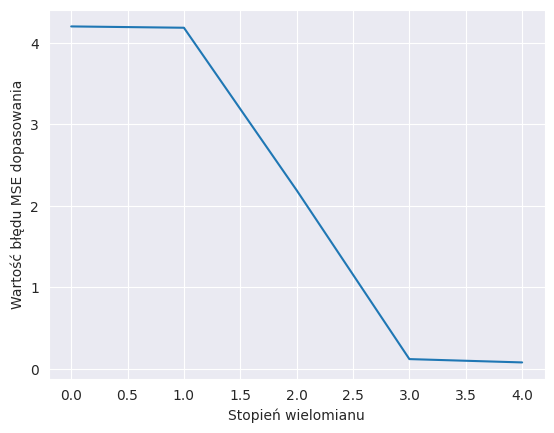

In [45]:
def our_regression_v2(x, y, stopien):
    X = np.ones(len(x))
    if stopien >= 1:
        for i in range(1, stopien + 1):
            X = np.vstack((X, np.power(x, i)))
        X = X.T
    else:
        print("Stopień wielomianu powinien być > 0 ")
        return
    w = np.dot(scipy.linalg.pinv(X), y)
    e = np.sum((np.dot(X, w) - y) ** 2) / len(x)
    return w, e

def predict_y(x_in: list, w_in: list):
    assert len(w_in) > 0
    y_out = []
    for x in x_in:
        y = 0
        for i in range(len(w_in)):
            y = y + x**i * w_in[i]
        y_out.append(y)
    return y_out

def predict_from_x_input_and_display_plot(x_in: list, ws_in: list, y_in: list, x_test: list, y_test: list):
    all_figures, plots = plt.subplots(nrows=1,ncols=len(ws_in))
    all_figures.set_figwidth(40)
    
    errsMSE_total = []
    errsTEST_total = []

    for k in range(len(ws_in)):
        y_outs = predict_y(x_in,ws_in[k])
        err_MSE = metrics.mean_squared_error(y_outs, y_in)
        errsMSE_total.append(err_MSE)

        plots[k].scatter(df.x, df.y, color='red')
        plots[k].scatter(x_in,y_outs,color='blue')
        if x_test is not None and y_test is not None:
            y_outs_test = predict_y(x_test,ws_in[k])
            err_TEST = metrics.mean_squared_error(y_outs_test, y_test)
            errsTEST_total.append(err_TEST)

            plots[k].scatter(x_test,y_test,color='green')
        plots[k].set_title(f"Ws {k+1}")
        
    err_fig = plt.figure()
    plt.xlabel("Stopień wielomianu")
    plt.ylabel("Wartość błędu MSE dopasowania")
    plt.plot(range(len(ws_in)),errsMSE_total)
    if x_test is not None and y_test is not None:
        errTest_fig = plt.figure()
        plt.xlabel("Stopień wielomianu")
        plt.ylabel("Wartość błędu MSE generalizacji")
        plt.plot(range(len(ws_in)),errsTEST_total)
        
# <---- Global Data ---->
xs = df.x.values
ys = df.y.values
x_ucz = xs
y_ucz = ys
ws = []
for i in range(1, 6):
    w, _ = our_regression_v2(x_ucz, y_ucz, i)
    ws.append(w)
# <---- Global Data ---->
predict_from_x_input_and_display_plot(xs,ws,ys,None,None)

> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


Im większy stopień wielomianu tym lepsze dopasowanie.

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [46]:
ws = np.polyfit(df.x,df.y,3)

> **Zadanie** Podziel zbiór na uczący i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

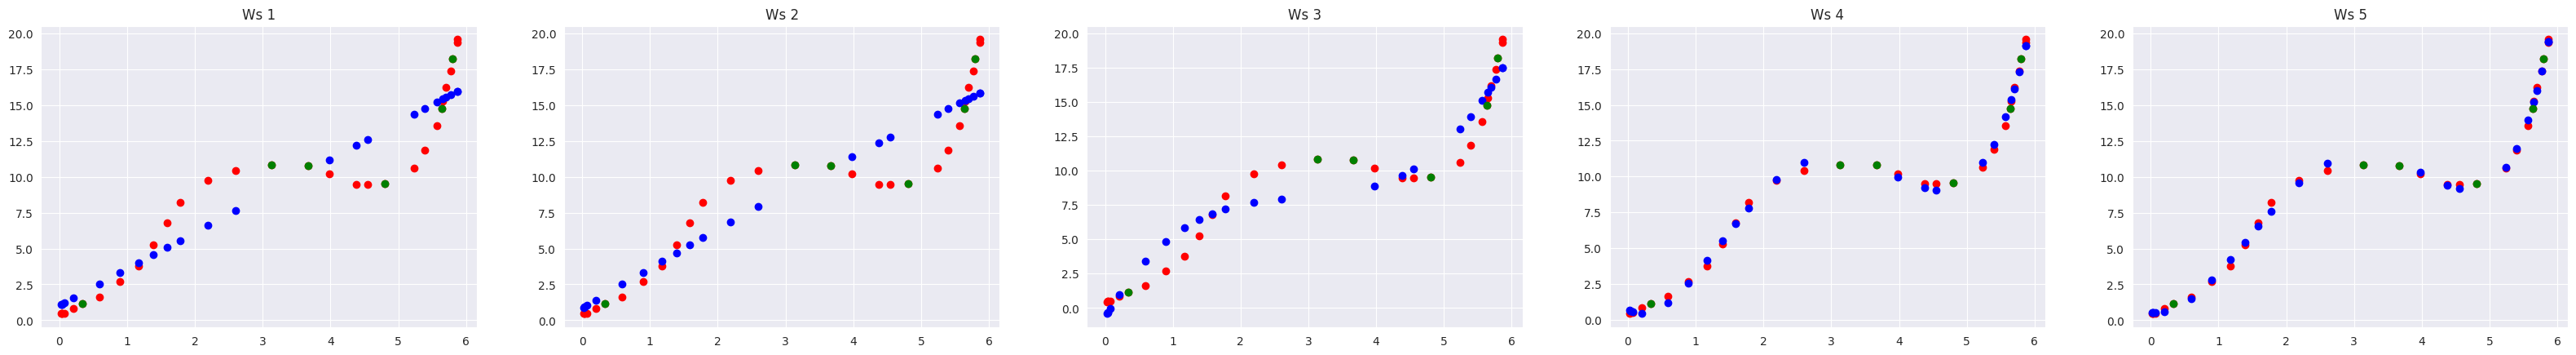

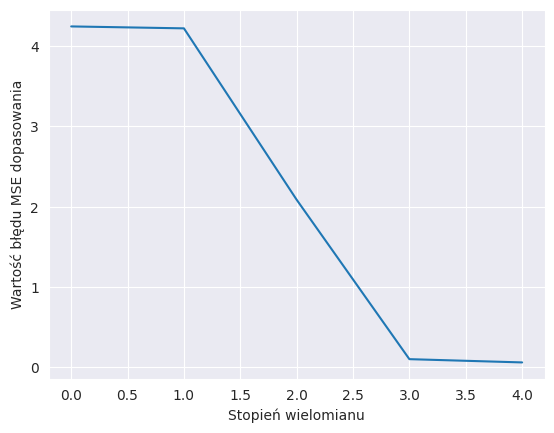

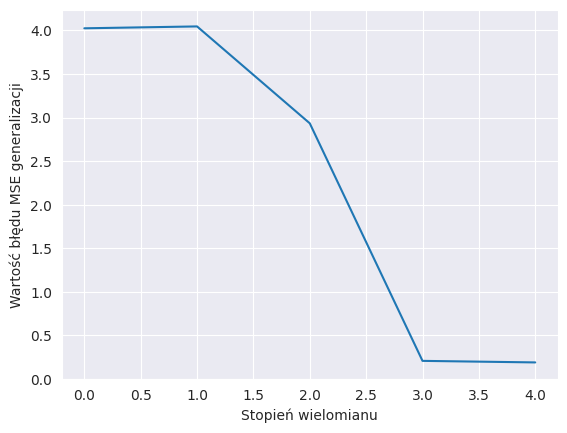

In [47]:
# <---- Global Data ---->
xs = df.x.values
ys = df.y.values
x_ucz, x_test, y_ucz, y_test = train_test_split(xs, ys, test_size=0.2, random_state=3)
ws = []
for i in range(1, 6):
    w, _ = our_regression_v2(x_ucz, y_ucz, i)
    ws.append(w)
# <---- Global Data ---->
predict_from_x_input_and_display_plot(x_ucz,ws,y_ucz,x_test,y_test)

Akurat w wypadku funkcji wyżej, najwyższy stopień wielomianu ma najmniejsze błędy generalizacji i uczenia. 

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?